<a href="https://colab.research.google.com/github/stevengregori92/Cleaning-and-Visualize-Data/blob/main/SimpleImputer_before_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.0 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=1751363f7c0bf2123e88f2226d86d9c8d5e2c378d9302e5d964368166dc3019c
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=cf6e8e1e4cc9fa4b0f8013102ae265d31cfad62458b303873866dac86a21910d
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [2]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

from jcopml.plot import plot_missing_value

In [3]:
!gdown https://drive.google.com/uc?id=1O6-IluiNoG5CNh5KLG5MH0qGl8IM5h5z

Downloading...
From: https://drive.google.com/uc?id=1O6-IluiNoG5CNh5KLG5MH0qGl8IM5h5z
To: /content/custsegment.zip
100% 102k/102k [00:00<00:00, 13.2MB/s]


In [4]:
!unzip /content/custsegment.zip

Archive:  /content/custsegment.zip
  inflating: Test.csv                
  inflating: Train.csv               


In [5]:
df = pd.read_csv('Train.csv')
pd.options.display.max_columns=50
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


,missing_value,%
ID,0,0.00
Gender,0,0.00
Ever_Married,140,1.74
Age,0,0.00
Graduated,78,0.97
Profession,124,1.54
Work_Experience,829,10.28
Spending_Score,0,0.00
Family_Size,335,4.15
Var_1,76,0.94


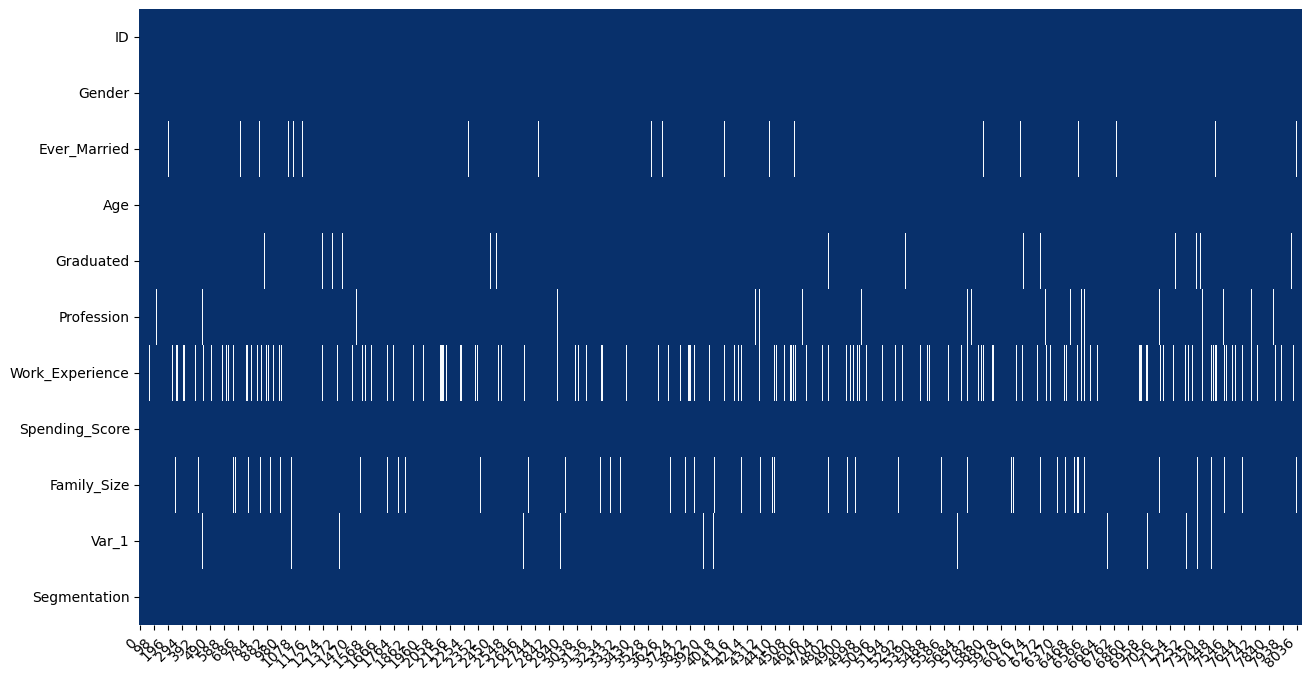

In [6]:
plot_missing_value(df, return_df=True)

In [7]:
df['Segmentation'] = df['Segmentation'].replace(['A', 'B', 'C', 'D'], [0,1,2,3])

In [8]:
df.drop(columns='ID', inplace=True)

#Impute Dataset

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
mf_inpute = SimpleImputer(strategy = 'most_frequent')
df[['Ever_Married', 'Graduated', 'Profession', 'Family_Size', 'Var_1']] = mf_inpute.fit_transform(df[['Ever_Married', 'Graduated', 'Profession', 'Family_Size', 'Var_1']])

mean_inpute = SimpleImputer(strategy='mean')
df[['Work_Experience']] = mean_inpute.fit_transform(df[['Work_Experience']])

df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,3
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,0
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,1
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,1
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,0
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.000000,Low,7.0,Cat_1,3
8064,Male,No,35,No,Executive,3.000000,Low,4.0,Cat_4,3
8065,Female,No,33,Yes,Healthcare,1.000000,Low,1.0,Cat_6,3
8066,Female,No,27,Yes,Healthcare,1.000000,Low,4.0,Cat_6,1


,missing_value,%
Gender,0,0.0
Ever_Married,0,0.0
Age,0,0.0
Graduated,0,0.0
Profession,0,0.0
Work_Experience,0,0.0
Spending_Score,0,0.0
Family_Size,0,0.0
Var_1,0,0.0
Segmentation,0,0.0


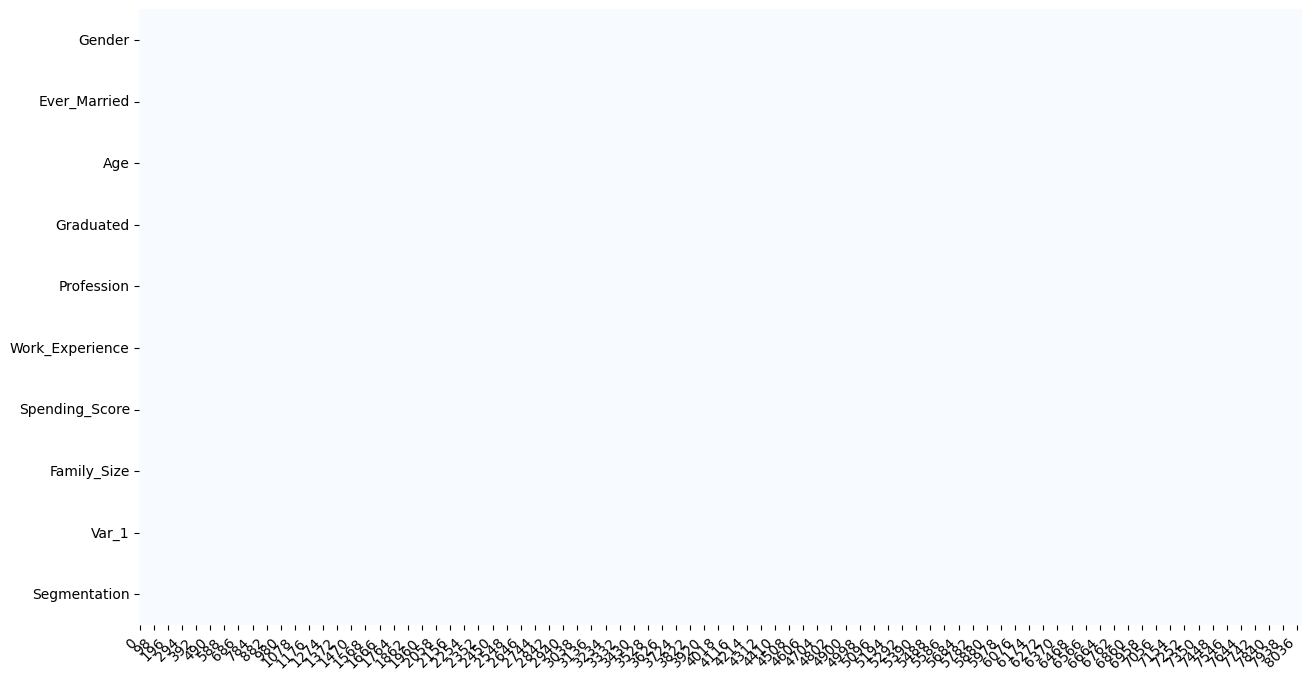

In [11]:
plot_missing_value(df, return_df=True)

In [12]:
df[['Gender']] = df[['Gender']].replace(['No', 'Yes'], [0,1])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   object 
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      8068 non-null   object 
 8   Var_1            8068 non-null   object 
 9   Segmentation     8068 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 630.4+ KB
